<img src="./imgs/tensorflow_head.png" />

# Tensorflow

**TensorFlow** (https://www.tensorflow.org/) es una librería de software desarrollada por Google Brain con el propósito de realizar investigación en Machine Learning y Deep Neural Network. 

## Principales características de Tensorflow

* Definir, optimizar, y calcular de forma eficiente expresiones matemáticas que involucran arrays multidimensionales (**tensores**).

* Soporte para la programación de ML y Deep Neural Networks.

* Uso transparente de computación con GPU, proporcionando gestión automática y optimización de la memoria y de los datos usados. Se puede ejecutar el mismo código en CPUs o GPUs. Más específicamente, TF decide qué partes de la computación deben ser trasladadas a la GPU.

* Alta escalabilidad de la computación tanto a nivel de máquina como de conjuntos de datos.

TensorFlow está disponible para uso directo desde Python y C++, aunque la API para Python está mejor documentada y es más sencilla.

# Ejemplo preliminar

In [1]:
# Un ejemplo de cálculo en Python
x = 1
y = x + 10
print(y)

11


In [2]:
import tensorflow as tf

In [3]:
# El "mismo" cálculo en TF
x = tf.constant(1, name='x')
y = tf.Variable(x+10, name='y')
print(y)

<tf.Variable 'y:0' shape=() dtype=int32, numpy=11>


## Sesiones y modelos

Para calcuar el valor de la variable `y` y evaluar la expresión necesitamos **inicializar** las variables y, entonces, crear una **sesión** donde se ejecuta la computación.

In [4]:
tf.compat.v1.disable_eager_execution()
model = tf.compat.v1.global_variables_initializer()

In [5]:
with tf.compat.v1.Session() as session:
    session.run(model)
    # session.run(y)

## Grafo del Flujo de Datos

* Una aplicación de Machine Learning es el resultado de la computación repetitiva de expresiones matemáticas complejas, por lo que podemos describir esta computación como un **Grafo de Flujo de Datos**.

* **Grafo de Flujo de Datos**: es un grafo donde:
    - cada Nodo representa la *instancia* de una operación matemática básica:
        - `multiplicar`, `sumar`, `dividir`
    - cada Arista es un dato multi-dimensional (`tensor`) sobre el que se ejecuta la operación.

<img src="./imgs/dfg.gif" />

## Modelo de Grafo de Tensorflow

* **Nodo**: En TensorFlow cada nodo representa la instanciación de una operación. 
    - Cada operación tiene entradas (`>= 2`) y salidas `>= 0`.
    
* **Aristas**: En TensorFlow hay dos tipos de aristas:
    - **Aristas de Datos**: son transportadores de estructuras de datos (`tensores`), donde una salida de una operación (que sale de un nodo) se convierte en la entrada de otra operación.
    - **Aristas de dependencia**: indican un *dependencia* entre dos nodos (es decir, una relación del tipo "sucede antes"). 
        + Si `A` y `B` son nodos y hay una dependencia de `A` a `B`, entonces `B` comenzará su operación solo cuando la de `A` haya acabado. 

* **Operación**: representa una computación abstracta, como sumar o multiplicar matrices. Manipula tensores, y puede ser polimórfica, es decir, puede manipular tensores de distinto tipo. 
  + Por ejemplo, la suma de dos tensores int32, la suma de dos tensores float, etc.

* **Kernel**: representa la implementación concreta de una operación. 
  + Por ejemplo, una operación `add matrix` puede tener una implementación CPU y otra GPU.

## Sesiones del Modelo de Grafos de Tensorflow

Para que el programa cliente pueda establecer comunicación con el sistema de ejecución de TF se debe crear una sesión y, en ese momento, se crea un grafo inicial vacío, que tiene dos métodos principales: 

* `session.extend`: usado durante una computación para añadir más operaciones (nodos) o datos (aristas).

* `session.run`: se ejecuta el grafo para obtener las salidas (a veces, subgrafos del grafo principal se pueden ejecutar miles de veces usando este tipo de llamadas).

<img src="./imgs/TF.png" />

# Tensorboard

**TensorBoard** es una herramienta de visualización que tiene como fin analizar el Grafo de Flujo de Datos y poder comprender mejor cómo funciona.

Puede mostrar diferentes tipos de métricas estadísticas acerca de los parámetros y detalles de cualquier parte de un grafo.

<img src="./imgs/tensorboard.png" />

# Tipos de Datos (Tensores)

## Tensores 1D (Vectores)

In [6]:
import numpy as np
tensor_1d = np.array([1, 2.5, 4.6, 5.75, 9.7])
tf_tensor=tf.convert_to_tensor(tensor_1d,dtype=tf.float64)

In [7]:
tf.compat.v1.disable_eager_execution()
hello = tf.constant('Bienvenido!')
sess = tf.compat.v1.Session()
print(sess.run(hello))

b'Bienvenido!'


In [8]:
with tf.compat.v1.Session() as session:
    print(sess.run(tf_tensor))
    print(sess.run(tf_tensor[0]))
    print(sess.run(tf_tensor[2]))

[1.   2.5  4.6  5.75 9.7 ]
1.0
4.6


In [9]:
print(tf.__version__)

2.4.1


## Tensores 2D (Matrices)

In [10]:
tensor_2d = np.arange(16).reshape(4, 4)
print(tensor_2d)
# tf_tensor = tf.placeholder(tf.float32, shape=(4, 4))
tf_tensor = tf.compat.v1.placeholder(tf.float32, shape=(4, 4))
with tf.compat.v1.Session() as sess:
# tf_tensor = tf.placeholder(tf.float32, shape=(4, 4))
# with tf.Session() as sess:
    print(sess.run(tf_tensor, feed_dict={tf_tensor: tensor_2d}))

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
[[ 0.  1.  2.  3.]
 [ 4.  5.  6.  7.]
 [ 8.  9. 10. 11.]
 [12. 13. 14. 15.]]


# Operaciones Básicas (Ejemplos)

In [11]:
matrix1 = np.array([(2,2,2),(2,2,2),(2,2,2)],dtype='float32') 
matrix2 = np.array([(1,1,1),(1,1,1),(1,1,1)],dtype='float32')

In [12]:
tf_mat1 = tf.constant(matrix1) 
tf_mat2 = tf.constant(matrix2)

In [13]:
matrix_product = tf.matmul(tf_mat1, tf_mat2)
matrix_sum = tf.add(tf_mat1, tf_mat2)

In [14]:
matrix_det = tf.raw_ops.MatrixDeterminant(input = tf_mat2)

In [15]:
with tf.compat.v1.Session() as sess: 
    prod_res = sess.run(matrix_product) 
    sum_res = sess.run(matrix_sum) 
    det_res = sess.run(matrix_det)

In [16]:
print("matrix1*matrix2 : \n", prod_res)
print("matrix1+matrix2 : \n", sum_res)
print("det(matrix2) : \n", det_res)

matrix1*matrix2 : 
 [[6. 6. 6.]
 [6. 6. 6.]
 [6. 6. 6.]]
matrix1+matrix2 : 
 [[3. 3. 3.]
 [3. 3. 3.]
 [3. 3. 3.]]
det(matrix2) : 
 0.0


# Manipulando Tensores

In [17]:
%matplotlib inline

In [18]:
import matplotlib.image as mp_image
filename = "imgs/Iris_sanguinea.jpg"
input_image = mp_image.imread(filename)

In [19]:
#dimension
print('input dim = {}'.format(input_image.ndim))
#shape
print('input shape = {}'.format(input_image.shape))

input dim = 3
input shape = (1406, 1200, 3)


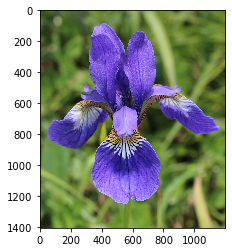

In [20]:
import matplotlib.pyplot as plt
plt.imshow(input_image)
plt.show()

### Slicing

In [21]:
my_image = tf.compat.v1.placeholder("uint8",[None,None,3])
slice = tf.slice(my_image,[10,0,0],[16,-1,-1])

In [22]:
with tf.compat.v1.Session() as session:
    result = session.run(slice,feed_dict={my_image: input_image})
    print(result.shape)

(16, 1200, 3)


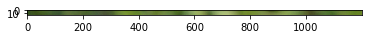

In [23]:
plt.imshow(result)
plt.show()

## Transpose

In [24]:
x = tf.Variable(input_image,name='x')
model = tf.compat.v1.global_variables_initializer()

with tf.compat.v1.Session() as session:
    x = tf.transpose(x, perm=[1,0,2])
    session.run(model)
    result=session.run(x)

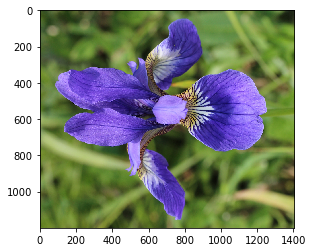

In [25]:
plt.imshow(result)
plt.show()

## Cálculo del Gradiente

In [26]:
x = tf.compat.v1.placeholder(tf.float32)
y = tf.compat.v1.log(x)   
var_grad = tf.gradients(y, x)
with tf.compat.v1.Session() as session:
    var_grad_val = session.run(var_grad, feed_dict={x:2})
    print(var_grad_val)

[0.5]


# Dispositivos de Computación

En un sistema habitual hay múltiples dispositivos de computación. TF soporta **CPU**, **GPU**, y **TPU**, que vienen representados como cadenas, por ejemplo:

* `"/cpu:0"`: La CPU de tu máquina.
* `"/gpu:0"`: La GPU de tu máquina, si tienes una.
* `"/gpu:1"`: Una segunda GPU.

Si una operación TF tiene implementaciones para **CPU** y **GPU**, los dispositivos GPU tendrán prioridad en la asignación de tareas. Por ejemplo, `matmul` tiene ambas implementaciones, por lo que en un sistema con dispositivos `cpu:0` y `gpu:0`, `gpu:0` será el seleccionado para ejecutar `matmul`.

Por ejemplo:

```python
# Creates a graph.
a = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[2, 3], name='a')
b = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[3, 2], name='b')
c = tf.matmul(a, b)
# Creates a session with log_device_placement set to True.
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))
# Runs the op.
print(sess.run(c))
```

```
Device mapping:
/job:localhost/replica:0/task:0/gpu:0 -> device: 0, name: GeForce GTX 760, pci bus
id: 0000:05:00.0
b: /job:localhost/replica:0/task:0/gpu:0
a: /job:localhost/replica:0/task:0/gpu:0
MatMul: /job:localhost/replica:0/task:0/gpu:0
[[ 22.  28.]
 [ 49.  64.]]
```

### y si hay varias GPUs

In [ ]:
# python
# Creates a graph.
c = []
for d in ['/gpu:0', '/gpu:1']:
  with tf.device(d):
    a = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[2, 3])
    b = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[3, 2])
    c.append(tf.matmul(a, b))
with tf.device('/cpu:0'):
  sum = tf.add_n(c)
# Creates a session with log_device_placement set to True.
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))
# Runs the op.
print sess.run(sum)
```

```
Device mapping:
/job:localhost/replica:0/task:0/gpu:0 -> device: 0, name: GeForce GTX 760, pci bus
id: 0000:02:00.0
/job:localhost/replica:0/task:0/gpu:1 -> device: 1, name: GeForce GTX 760, pci bus
id: 0000:03:00.0
Const_3: /job:localhost/replica:0/task:0/gpu:0
Const_2: /job:localhost/replica:0/task:0/gpu:0
MatMul_1: /job:localhost/replica:0/task:0/gpu:0
Const_1: /job:localhost/replica:0/task:0/gpu:1
Const: /job:localhost/replica:0/task:0/gpu:1
MatMul: /job:localhost/replica:0/task:0/gpu:1
AddN: /job:localhost/replica:0/task:0/cpu:0
[[  44.   56.]
 [  98.  128.]]
```